In [1]:
# Install rdkit
!pip install rdkit-pypi

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [2]:
import rdkit
from rdkit.Chem import MolFromSmiles, Draw

paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol_mol = MolFromSmiles(paracetamol_smiles)

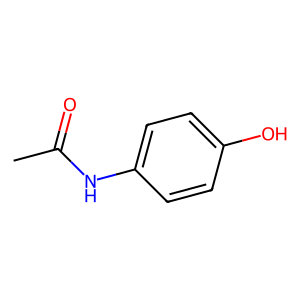

In [3]:
Draw.MolToImage(paracetamol_mol, size=(300, 300))

In [4]:
print(paracetamol_mol.GetNumAtoms())

11


Le nombre d'atomes dans la molécule est de 11, si l'on ne compte que les atomes non hydrogènes. Car RDKit n'inclut pas les hydrogènes implicites dans le nombre d'atomes lors de la lecture à partir de SMILES.

In [5]:
atoms = paracetamol_mol.GetAtoms()
for atom in atoms:
    print(atom.GetSymbol())

C
C
O
N
C
C
C
C
O
C
C


In [6]:
print(paracetamol_mol.GetNumBonds())

11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [7]:
import rdkit
from rdkit.Chem import SDMolSupplier

supplier = SDMolSupplier("morphine.sdf")
mol = supplier[0]


In [8]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

fingerprint = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
print(fingerprint.ToBitString())

0000000000000001000000000000000001001000000000000000000000010000000100000000010000000000000000000000000000000000000000000100000000000000001000000001001000000000000000000000000000000000000000000000000000000000000110000000000000000001010000000000000000000000000000000000001000000000000000000000000010000000000000010000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000001000010000000000000000000000000000000000000100001000000000000000000000000000001000000000010000000000000000000000000000000000010000000000000000000010000000000000010000000010100100000000000000100000000000000000000000000000000000000000000000010000000010000000010000000000000000000000000000000000000001000000000000000000001000000000000000000000001000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000001000000000000000000000001000000000000000000000000000000000000000000000000000010000000010000100000000000000010000000000000000000000000000000000000000000

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [9]:
import rdkit
from rdkit.Chem import AllChem, MolFromSmiles
from numpy import array, nonzero

paracetamol_smiles = "CC(=O)OC1=CC=CC=C1C(O)=O"
paracetamol_mol = MolFromSmiles(paracetamol_smiles)
paracetamol_fingerprint = AllChem.GetMorganFingerprintAsBitVect(
    paracetamol_mol, radius=2, nBits=1024)

# Convert the fingerprint to a numpy vector
paracetamol_fingerprint_vector = array(paracetamol_fingerprint)

# Find the elements that are nonzero of the vector
nonzero_elements = nonzero(paracetamol_fingerprint_vector)[0]

# Print the number of nonzero elements
print(len(nonzero_elements))

# Print the first 10 nonzero elements
print(nonzero_elements[:10])


24
[ 11  23  33  64 175 356 386 389 423 444]


In [10]:
import rdkit
from rdkit.Chem import AllChem, MolFromSmiles
from numpy import array, nonzero

aspirin_smiles = "CC(=O)NC1=CC=C(O)C=C1"
aspirin_mol = MolFromSmiles(aspirin_smiles)
aspirin_fingerprint = AllChem.GetMorganFingerprintAsBitVect(
    aspirin_mol, radius=2, nBits=1024)

# Convert the fingerprint to a numpy vector
aspirin_fingerprint_vector = array(aspirin_fingerprint)

# Find the elements that are nonzero of the vector
nonzero_elements = nonzero(aspirin_fingerprint_vector)[0]

# Print the number of nonzero elements
print(len(nonzero_elements))

# Print the first 10 nonzero elements
print(nonzero_elements[:10])

19
[ 33  53 128 191 245 289 356 530 578 650]


In [11]:
from rdkit.DataStructs import DiceSimilarity

# Compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin
dice_similarity = DiceSimilarity(paracetamol_fingerprint, aspirin_fingerprint)

# Print the DiceSimilarity score
print(dice_similarity)

0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [12]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

# Chargement de la molécule de Paracetamol
paracetamol = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")

# Création d'une liste de tous les descripteurs disponibles dans RDKit
descriptors_list = [x[0] for x in Chem.Descriptors.descList]

# Création d'un calculateur de descripteurs
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(
    descriptors_list)

# Calcul des descripteurs du Paracetamol
paracetamol_descriptors = calculator.CalcDescriptors(paracetamol)

# Affichage des descripteurs
for name, value in zip(descriptors_list, paracetamol_descriptors):
    print(f"{name}: {value}")


MaxEStateIndex: 10.524468537414966
MinEStateIndex: -0.11510204081632636
MaxAbsEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
qed: 0.5950261967780849
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359853
BCUT2D_CHGLO: -1.9945540738765868
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1: 5.1815405503520555
Chi1n: 3.2490981480278296
Chi

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

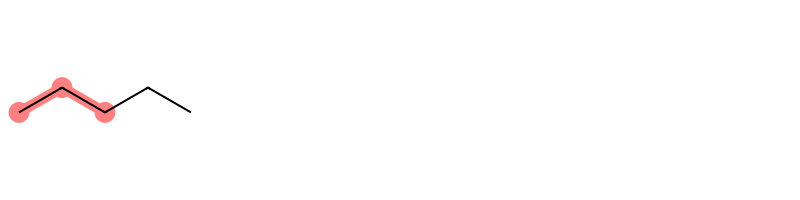

In [13]:
import re

# Liste de molécules
smiles_list = ["CCCCC", "CCOCC", "CCNCC",
               "CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

# Motif à rechercher
pattern = "CCC"

# Création d'une liste de sous-structures correspondant au motif
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
pattern = Chem.MolFromSmarts(pattern)
matching_molecules = [
    mol for mol in molecules if mol.HasSubstructMatch(pattern)]

# Print la molécule correspondant au motif
Draw.MolsToGridImage(matching_molecules, molsPerRow=4, subImgSize=(200, 200),
                            highlightAtomLists=[mol.GetSubstructMatch(pattern) for mol in matching_molecules])


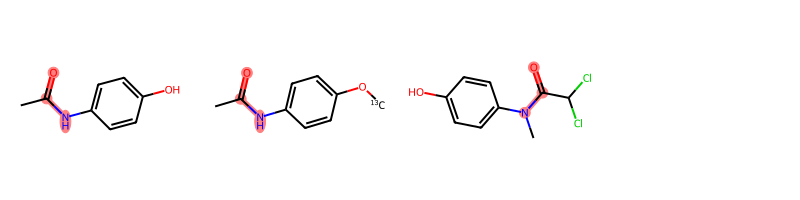

In [14]:
# Motif à rechercher
pattern2 = "C(=O)N"

# Création d'une liste de sous-structures correspondant au motif
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
pattern2 = Chem.MolFromSmarts(pattern2)
matching_molecules = [
    mol for mol in molecules if mol.HasSubstructMatch(pattern2)]

# Print la molécule correspondant au motif
Draw.MolsToGridImage(matching_molecules, molsPerRow=4, subImgSize=(200, 200),
                     highlightAtomLists=[mol.GetSubstructMatch(pattern2) for mol in matching_molecules])

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [15]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


    MolWt  MolLogP  NumHDonors  NumHAcceptors
0  72.151   2.1965           0              0
1  70.135   1.9505           0              0
2  86.178   2.5866           0              0
3  86.178   2.4425           0              0
4  86.178   2.4425           0              0


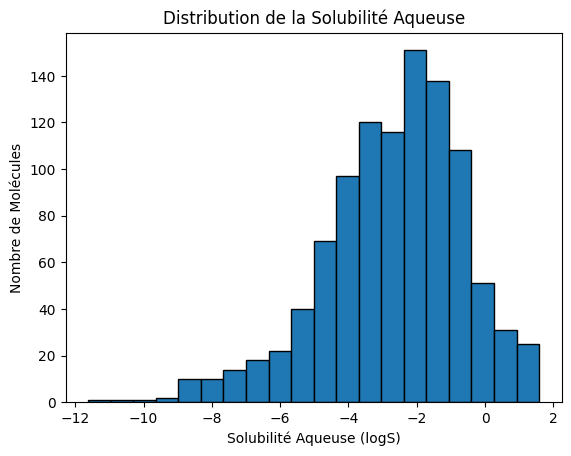

In [25]:
# Importer les bibliothèques nécessaires
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

# Étape 1 : Charger le fichier SDF
sdf_file = "solubility.train.sdf"

# Étape 2 : Charger la liste de molécules
molecule_list = []
suppl = Chem.SDMolSupplier(sdf_file, removeHs=False)
molecule_list = [mol for mol in supplier if mol is not None]

# Étape 3 : Fonction pour calculer les descripteurs


def calculate_descriptors(mol):
    num_carbon_atoms = [Descriptors.MolWt(mol),
    Descriptors.MolLogP(mol),
    Descriptors.NumHDonors(mol),
    Descriptors.NumHAcceptors(mol)]
    return num_carbon_atoms


# Étape 4 : Calcul des descripteurs pour toutes les molécules
data = []
for mol in molecule_list:
    descriptors = calculate_descriptors(mol)
    data.append(descriptors)

df = pd.DataFrame(
    data, columns=['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors'])

# Afficher quelques lignes du dataframe
print(df.head())

# Étape 5 : Obtenir la solubilité aqueuse (logS)
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]

# Étape 6 : Tracer l'histogramme des labels (solubilité)
plt.hist(labels, bins=20, edgecolor='k')
plt.xlabel('Solubilité Aqueuse (logS)')
plt.ylabel('Nombre de Molécules')
plt.title('Distribution de la Solubilité Aqueuse')
plt.show()

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [26]:
# Étape 1 : Vérification des valeurs NaN
nan_rows = df[df.isna().any(axis=1)]
print(f"Il y a {len(nan_rows)} lignes avec des valeurs NaN dans le dataframe.")

# Suppression des lignes avec des NaN
df = df.dropna()
labels = [labels[i] for i in range(len(labels)) if i not in nan_rows.index]

Il y a 0 lignes avec des valeurs NaN dans le dataframe.


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Étape 2 : Normalisation avec MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
df = pd.DataFrame(df_normalized, columns=df.columns)
df.head()

C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

,MolWt,MolLogP,NumHDonors,NumHAcceptors
0,0.042084,0.477045,0.0,0.0
1,0.038831,0.460318,0.0,0.0
2,0.064721,0.503570,0.0,0.0
3,0.064721,0.493772,0.0,0.0
4,0.064721,0.493772,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Étape 3 : Construction et entraînement d'un modèle de régression
X_train, X_test, y_train, y_test = train_test_split(
    df, labels, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

LinearRegression()

In [29]:
# Étape 4 : Calcul de l'erreur RMSE
y_pred = regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"L'erreur RMSE est : {rmse}")

L'erreur RMSE est : 0.922109841709294


C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [ ]:
# 1. Download the file
!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [30]:
list_molecule_test = []
suppl_test = Chem.SDMolSupplier("solubility.test.sdf", removeHs=False)
list_molecule_test = [mol for mol in supplier if mol is not None]


In [31]:
mol_test = list_molecule_test[0]
descriptors_test = calculate_descriptors(mol_test)

In [32]:
descriptors_test_normalized = scaler.transform([descriptors_test])

C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
logS_predicted = regressor.predict(descriptors_test_normalized)[0]

# Obtenez la valeur réelle de logS pour la molécule de test
logS_real = float(mol_test.GetProp('SOL'))

# Comparez la prédiction avec la valeur réelle
print("Prédiction de logS:", logS_predicted)
print("Valeur réelle de logS:", logS_real)

Prédiction de logS: -1.799025291096127
Valeur réelle de logS: -3.18


C:\Users\paulc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
rmse_test = mean_squared_error([logS_real], [logS_predicted], squared=False)
print(f"Erreur RMSE pour ce point de données : {rmse_test}")

Erreur RMSE pour ce point de données : 1.380974708903873
